In [74]:
import csv
import requests
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timezone
import time
import alpaca_trade_api as tradeapi

import plotly.express as px

import sqlite3
from sqlite3 import Error


In [75]:
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))

<class 'str'>


In [76]:
#Get tickers
tickers=[]
with open("sp20.csv",'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    print(header)
    for row in csvreader:
        tickers.append(row[2])

print(tickers)


['ï»¿Number', 'Company', 'Symbol', 'Weight']
['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'TSLA', 'BRK.B', 'NVDA', 'JPM', 'JNJ', 'V', 'UNH', 'PYPL', 'HD', 'MA', 'PG', 'DIS', 'BAC', 'ADBE']


In [83]:
end = datetime(2021,6,25,23,0,0,0,timezone.utc).isoformat()
start = datetime(2021,6,25,7,0,0,0,timezone.utc).isoformat()

In [84]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [85]:
aapl_df = pd.DataFrame(alpaca.get_bars("AAPL", tradeapi.rest.TimeFrame.Hour, start=start, end=end, limit=10000).df["close"])

In [86]:
aapl_df.head()

,close
timestamp,
2021-06-25 08:00:00+00:00,133.32
2021-06-25 09:00:00+00:00,133.60
2021-06-25 10:00:00+00:00,133.45
2021-06-25 11:00:00+00:00,133.33
2021-06-25 12:00:00+00:00,133.57


In [87]:
for i in range(0,len(aapl_df)):
    print (aapl_df.index[i])

2021-06-25 08:00:00+00:00
2021-06-25 09:00:00+00:00
2021-06-25 10:00:00+00:00
2021-06-25 11:00:00+00:00
2021-06-25 12:00:00+00:00
2021-06-25 13:00:00+00:00
2021-06-25 14:00:00+00:00
2021-06-25 15:00:00+00:00
2021-06-25 16:00:00+00:00
2021-06-25 17:00:00+00:00
2021-06-25 18:00:00+00:00
2021-06-25 19:00:00+00:00
2021-06-25 20:00:00+00:00
2021-06-25 21:00:00+00:00
2021-06-25 22:00:00+00:00
2021-06-25 23:00:00+00:00


In [92]:
db_file = "pythonsqlite.db"
conn = sqlite3.connect(db_file)
sql_insert = "INSERT INTO historical(symbol, timestamp, close) VALUES(?,?,?)"
cur = conn.cursor()

for year in range(2017,2021+1):
    end = datetime(year,6,25,23,0,0,0,timezone.utc).isoformat()
    start = datetime(year,6,25,7,0,0,0,timezone.utc).isoformat()
    for ticker in tickers:
        df = alpaca.get_bars(ticker, tradeapi.rest.TimeFrame.Hour, start=start, end=end, limit=100).df
        for i in range(0,len(df)):
            cur.execute(sql_insert, (ticker, df.index[i].isoformat() , df.iloc[i]["close"]))

conn.commit()
conn.close()


sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BAC/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/AAPL/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/FB/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BRK.B/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/JPM/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/PYPL/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/DIS/bars 3 more time(s)...


In [27]:
df_list = []
for ticker in tickers:
    df_list.append(alpaca.get_bars(ticker, tradeapi.rest.TimeFrame.Hour, start=start, end=end, limit=300).df["close"])

sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BAC/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BAC/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/ADBE/bars 3 more time(s)...


<AxesSubplot:xlabel='timestamp'>

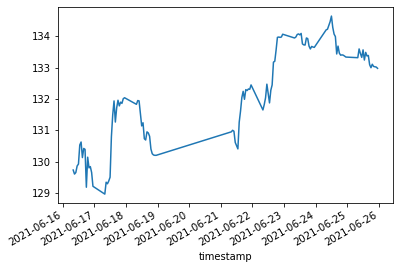

In [28]:
df_list[0].plot()

In [32]:
(df_list[0])

128